## Goal

Using 300deg data set, we gonna try to figure out the position of the beam center using contour plots.

In [1]:
import os
import pandas as pd
import numpy as np
import lmfit
import glob
import pprint
from PIL import Image

from ipywidgets import interactive
import ipywidgets as widgets

from skimage.filters import median

import matplotlib.pyplot as plt
%matplotlib notebook

Define the **base folder (base_folder)** from where all the data set will be located. 

For example, if you are working on the analysis machine:

*base_folder = "/SNS/VENUS/IPTS-31716/shared/NC_images/2023-06-12"*


In [2]:
base_folder = "/Users/j35/SNS/VENUS/IPTS-31716-first_experiment_ever/"
assert os.path.exists(base_folder)  # making sure the base folder exists

## working image 

In [3]:
image_filename = os.path.join(base_folder, '300deg_nbr1_30s_frames_OB/15_29_59/300deg_nbr1_30s_frames_OB_00001.tif')
assert os.path.exists(image_filename)

## loading image 

In [4]:
image = np.asarray(Image.open(image_filename))

<IPython.core.display.Javascript object>


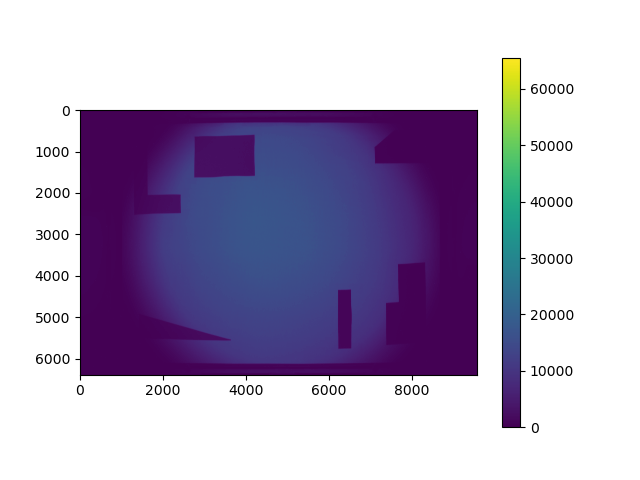

In [5]:
plt.figure(0)
plt.imshow(image)
plt.colorbar()

## Crop image in order to only display background  

In [6]:
%matplotlib inline
[height, width] = np.shape(image)

def plot(left, right, top, bottom):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
    ax_image = ax.imshow(image)
    ax.axvline(left, color='blue')
    ax.axvline(right, color='blue')
    ax.axhline(top, color='red')
    ax.axhline(bottom, color='red')
    plt.show()
    
    return left, right, top, bottom
    
cropping = interactive(plot,
               left = widgets.IntSlider(min=0, max=width-1, value=0, continuous_update=False),
               right = widgets.IntSlider(min=0, max=width-1, value=width-1, continuous_update=False),
               top = widgets.IntSlider(min=0, max=height-1, value=0, continuous_update=False),
               bottom = widgets.IntSlider(min=0, max=height-1, value=height-1, continuous_update=False))
display(cropping)

interactive(children=(IntSlider(value=0, continuous_update=False, description='left', max=9575), IntSlider(val…

<IPython.core.display.Javascript object>


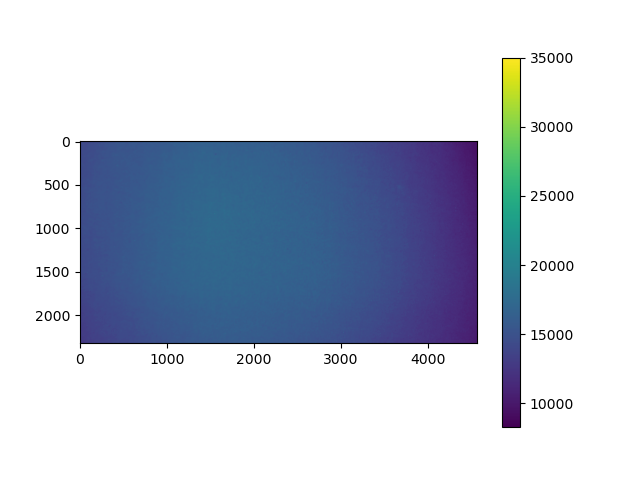

In [37]:
[left, right, top, bottom] = cropping.result
image_cropped = image[top: bottom, left: right]

plt.figure(1)
plt.imshow(image_cropped, vmax=35000)
plt.colorbar()

## display contour plot 

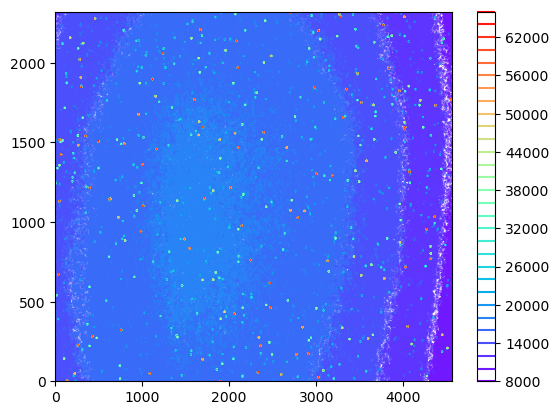

In [30]:
plt.figure(2)
plt.contour(image_cropped, levels=30, cmap='rainbow')
plt.colorbar()

## apply median filter 

In [32]:
image_cropped_filtered = median(image_cropped)

<IPython.core.display.Javascript object>


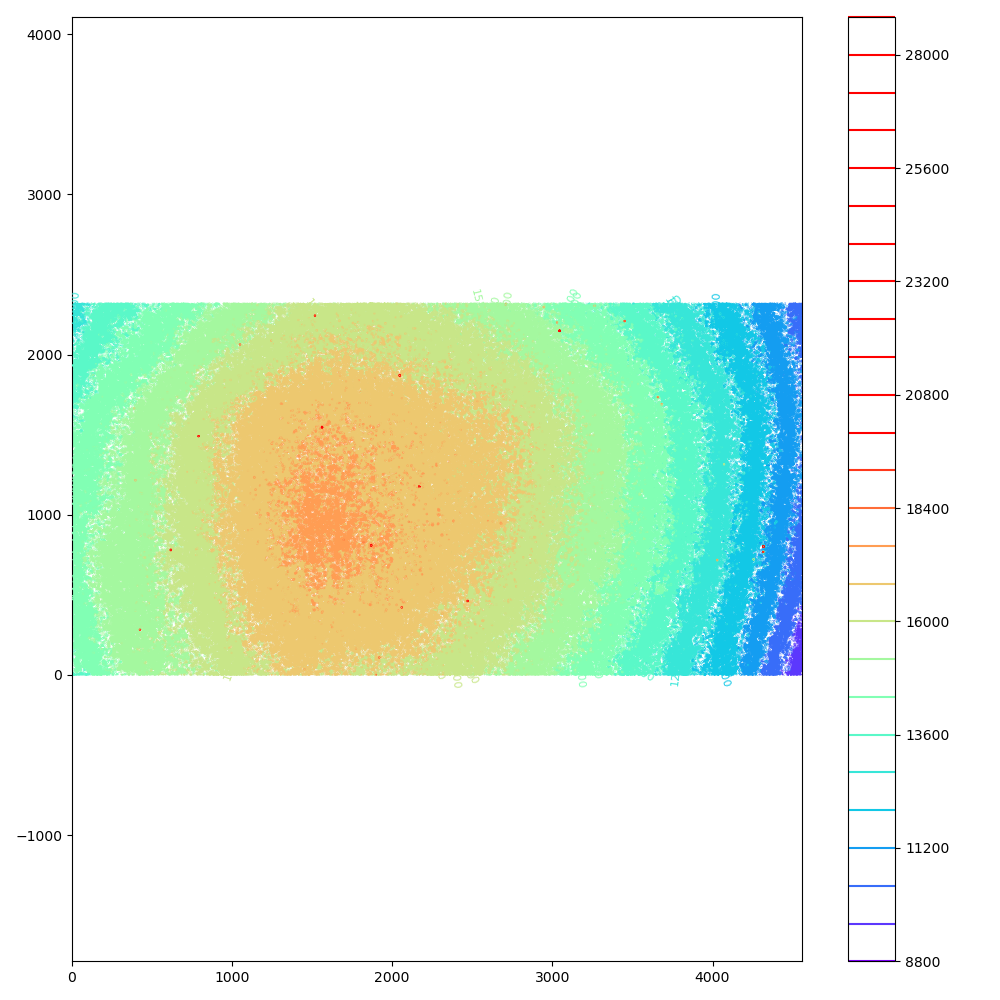

In [45]:
fig = plt.figure(3, figsize=(10, 10))
my_plot = plt.contour(image_cropped_filtered, levels=30, cmap='rainbow', vmax=20000)
plt.colorbar()
plt.clabel(my_plot, inline=True, fontsize=8)
my_plot.axes.axis('equal')
fig.tight_layout()

## plotting in 3D 

In [48]:
new_height, new_width = np.shape(image_cropped_filtered)

In [65]:
X = np.arange(new_width) + left
Y = np.arange(new_height) + top

In [75]:
print(f"{np.shape(X) = }")
print(f"{np.shape(Y) = }")
print(f"{np.shape(image_cropped_filtered)} ")

np.shape(X) = (4562,)
np.shape(Y) = (2321,)
(2321, 4562) 


<IPython.core.display.Javascript object>


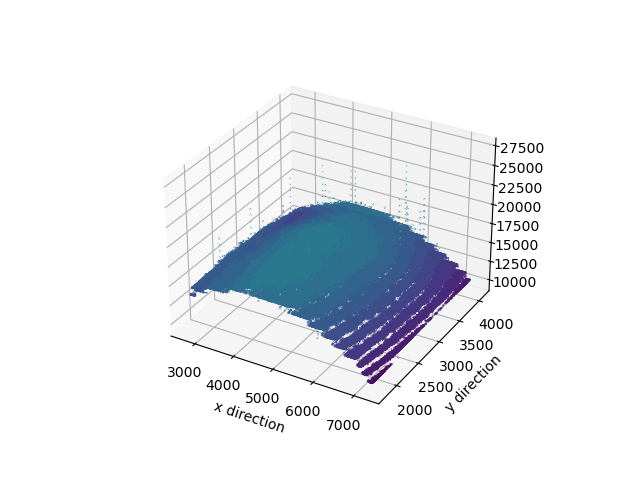

Text(0.5, 0.5, 'y direction')

In [76]:
fig = plt.figure(4)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, image_cropped_filtered, 30)

ax.set_xlabel("x direction")
ax.set_ylabel("y direction")